In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
prices_df = pd.read_csv('train.csv')
prices_df

test_df = pd.read_csv('test.csv')

In [3]:
prices_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

> **QUESTION 2**: How many rows and columns does the dataset contain? 

In [4]:
n_rows = test_df.shape[0]
n_cols = test_df.shape[1]
print('The dataset contains {} rows and {} columns.'.format(n_rows, n_cols))

The dataset contains 1459 rows and 80 columns.


In [5]:
n_rows = prices_df.shape[0]
n_cols = prices_df.shape[1]
print('The dataset contains {} rows and {} columns.'.format(n_rows, n_cols))

The dataset contains 1460 rows and 81 columns.


<Axes: >

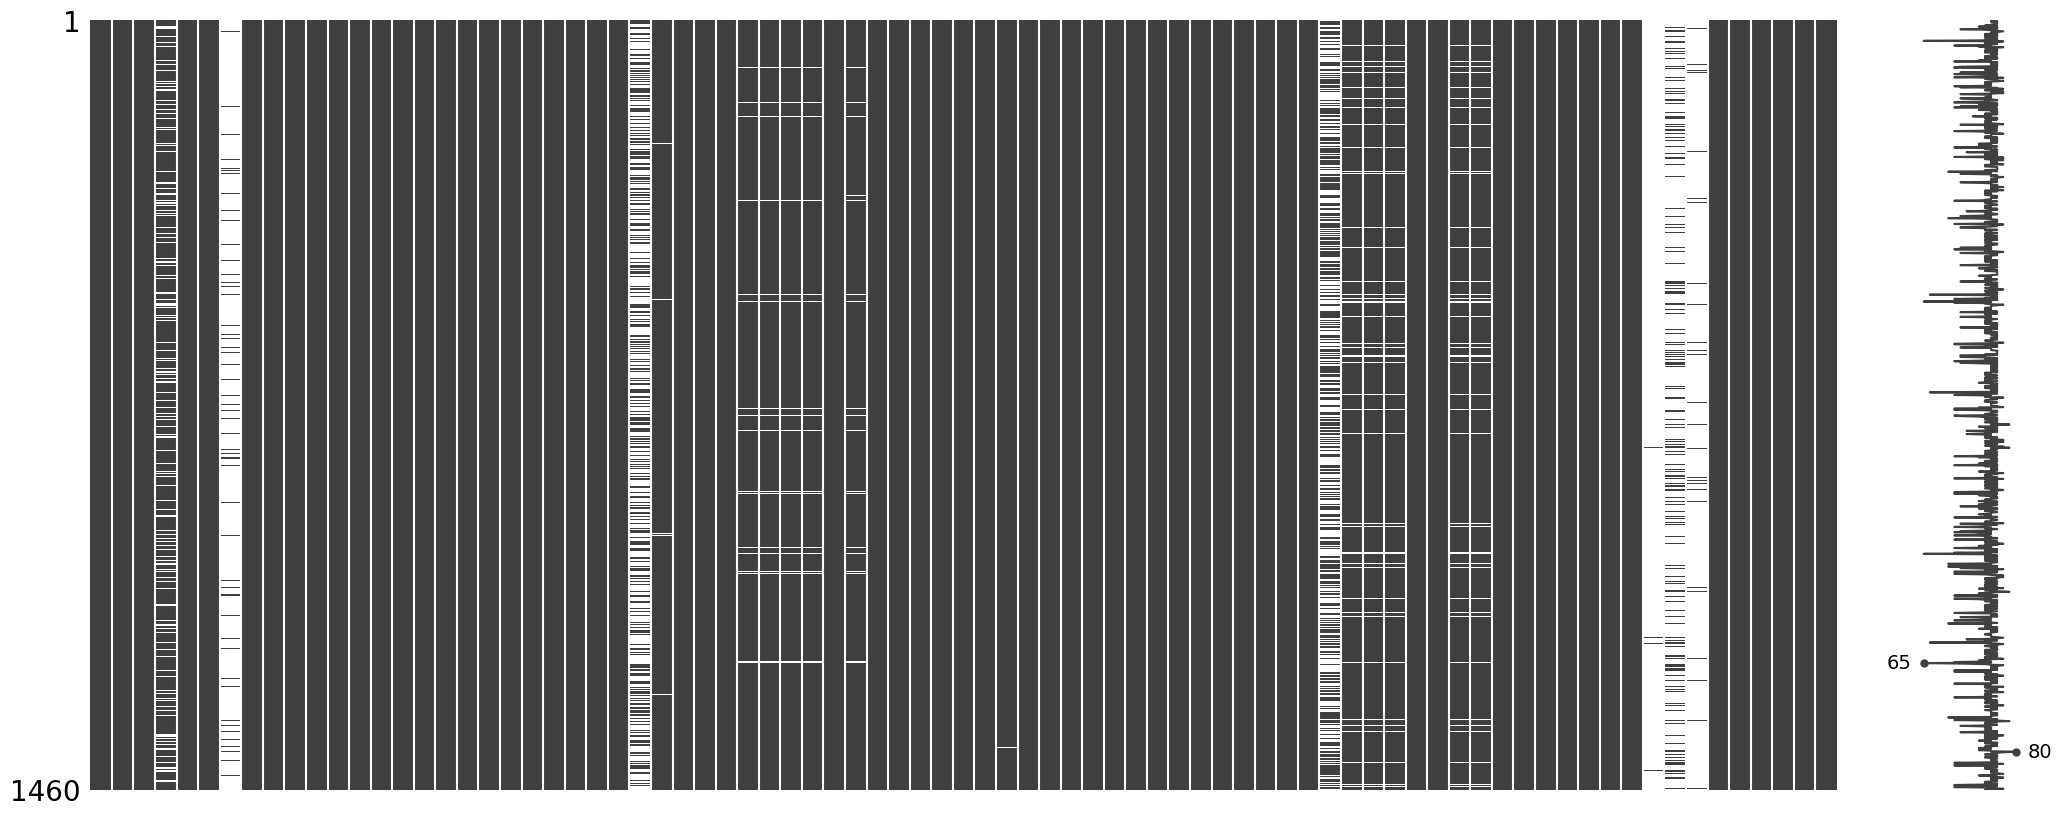

In [6]:
import missingno as msno

msno.matrix(prices_df)

<Axes: >

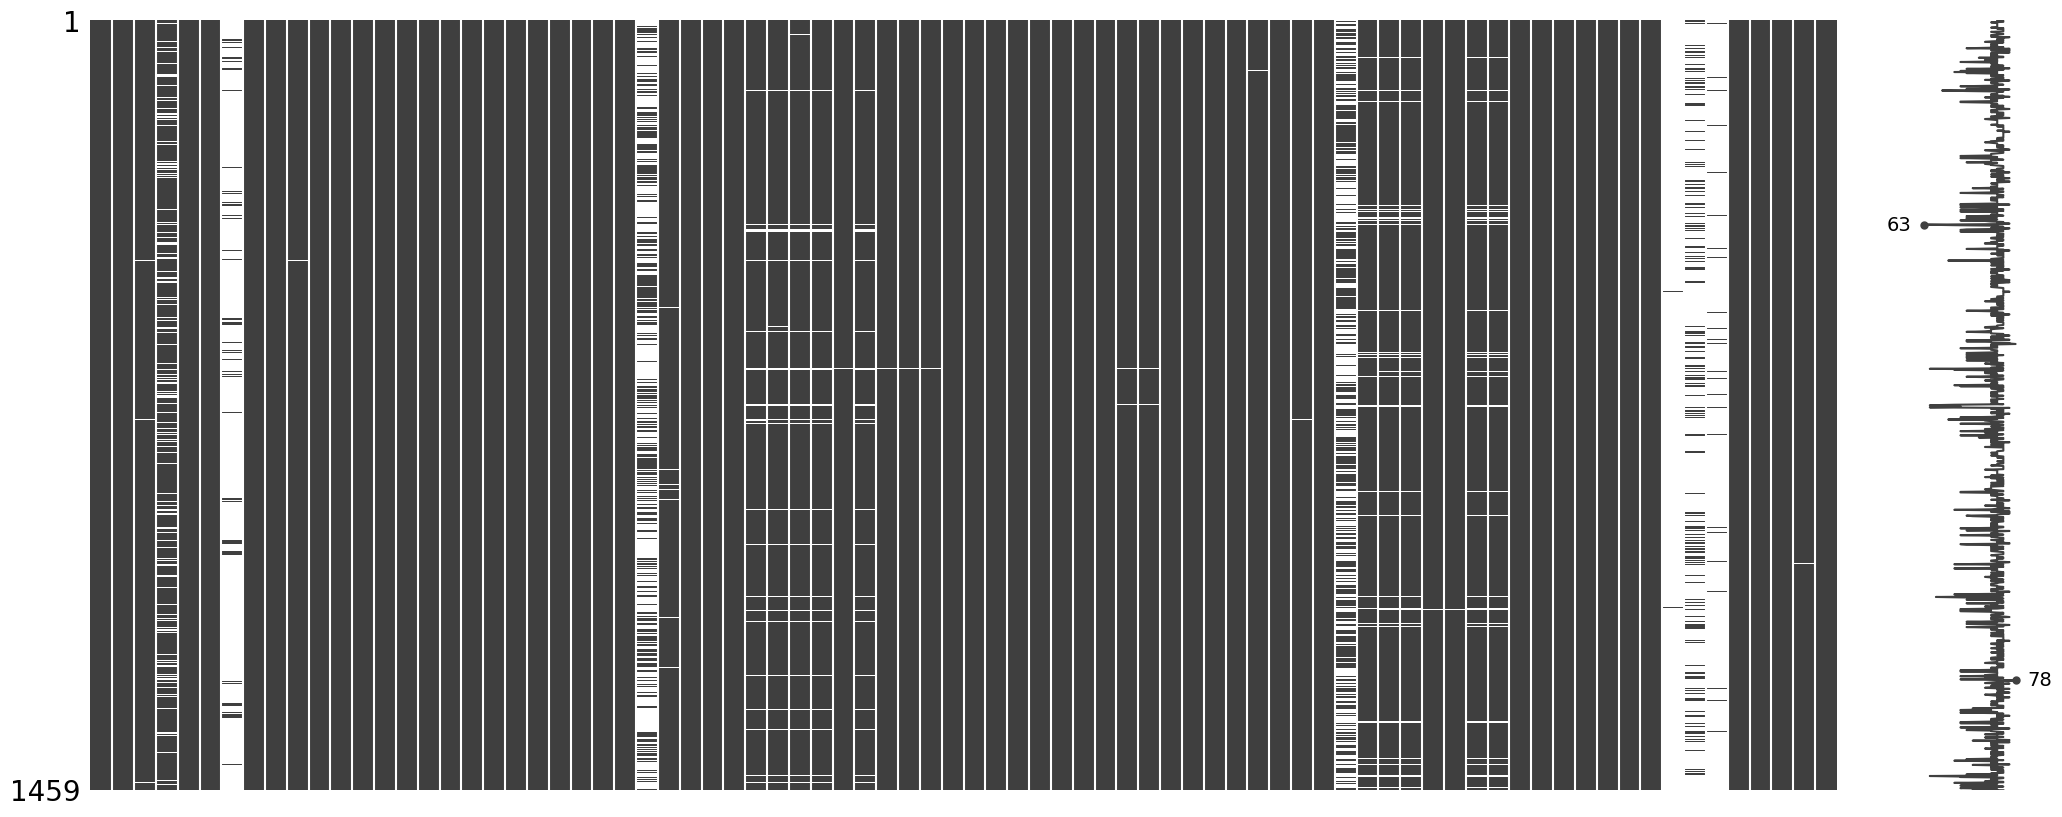

In [7]:
msno.matrix(test_df)

# Data Exploration and Analysis

 Columns like 'Alley', 'FireplaceQu', etc have a significant amount of null values.
 
Also, there are data type discrepancies in columns like 'YearBuilt', 'YearRemodAdd', etc

After having a read of 'data_description.txt', we can conlude that all the variables are of two types: Numerical or Categorical. 

Next, after careful read-through of all the variables, we can conclude that all of them fall under one of three possible sections. They are:

**Building attributes -** It covers all the physical attributes of a building


**Space properties -** It includes all the info about spaces in houses


**Location/place -** It consists of the whereabouts of the buildings


For instance, OverallQual is under the Building attributes segment, TotalBsmtSF is classified as space properties, and Neighborhood is related to Location/place segment.

In [8]:
# delete the columns
columns_to_delete = ['Alley', 'PoolQC', 'Fence', 'MiscFeature', 'FireplaceQu', 'MasVnrType']
prices_df = prices_df.drop(columns = columns_to_delete)

test_df = test_df.drop(columns = columns_to_delete)

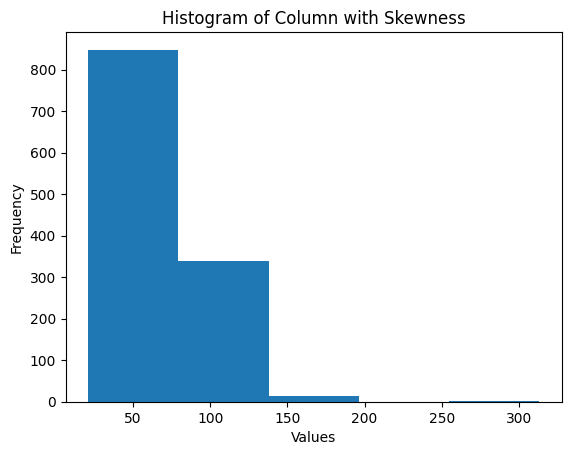

Skewness: 2.163569142324884


In [9]:
# Imputing LotFrontage column

# Checking for skewness 
import matplotlib.pyplot as plt
plt.hist(prices_df.LotFrontage, bins = 5)
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Histogram of Column with Skewness')
plt.show()

skewness = prices_df['LotFrontage'].skew()
print(f"Skewness: {skewness}")

Since 'LotFrontage' is positively skewed, We will use median imputation as it is less affected by extreme values and better represents the central tendency of the data.

In [10]:
prices_df.LotFrontage.fillna(prices_df.LotFrontage.median(), inplace=True)
test_df.LotFrontage.fillna(test_df.LotFrontage.median(), inplace=True)

Let's check the remaining empty rows in the dataset

In [11]:
# Training Set
null_counts = prices_df.isnull().sum()
for col, count in null_counts.items():
    if count>0:
        print(f"Column {col} has {count} null value(S)")

Column MasVnrArea has 8 null value(S)
Column BsmtQual has 37 null value(S)
Column BsmtCond has 37 null value(S)
Column BsmtExposure has 38 null value(S)
Column BsmtFinType1 has 37 null value(S)
Column BsmtFinType2 has 38 null value(S)
Column Electrical has 1 null value(S)
Column GarageType has 81 null value(S)
Column GarageYrBlt has 81 null value(S)
Column GarageFinish has 81 null value(S)
Column GarageQual has 81 null value(S)
Column GarageCond has 81 null value(S)


In [12]:
# Testing Set
null_counts = test_df.isnull().sum()
for col, count in null_counts.items():
    if count>0:
        print(f"Column {col} has {count} null value(S)")

Column MSZoning has 4 null value(S)
Column Utilities has 2 null value(S)
Column Exterior1st has 1 null value(S)
Column Exterior2nd has 1 null value(S)
Column MasVnrArea has 15 null value(S)
Column BsmtQual has 44 null value(S)
Column BsmtCond has 45 null value(S)
Column BsmtExposure has 44 null value(S)
Column BsmtFinType1 has 42 null value(S)
Column BsmtFinSF1 has 1 null value(S)
Column BsmtFinType2 has 42 null value(S)
Column BsmtFinSF2 has 1 null value(S)
Column BsmtUnfSF has 1 null value(S)
Column TotalBsmtSF has 1 null value(S)
Column BsmtFullBath has 2 null value(S)
Column BsmtHalfBath has 2 null value(S)
Column KitchenQual has 1 null value(S)
Column Functional has 2 null value(S)
Column GarageType has 76 null value(S)
Column GarageYrBlt has 78 null value(S)
Column GarageFinish has 78 null value(S)
Column GarageCars has 1 null value(S)
Column GarageArea has 1 null value(S)
Column GarageQual has 78 null value(S)
Column GarageCond has 78 null value(S)
Column SaleType has 1 null val

Now, we can delete the remaining empty rows as their number is not significant and most of the missing rows are correlated with other missing rows and hence can't be computed

<Axes: >

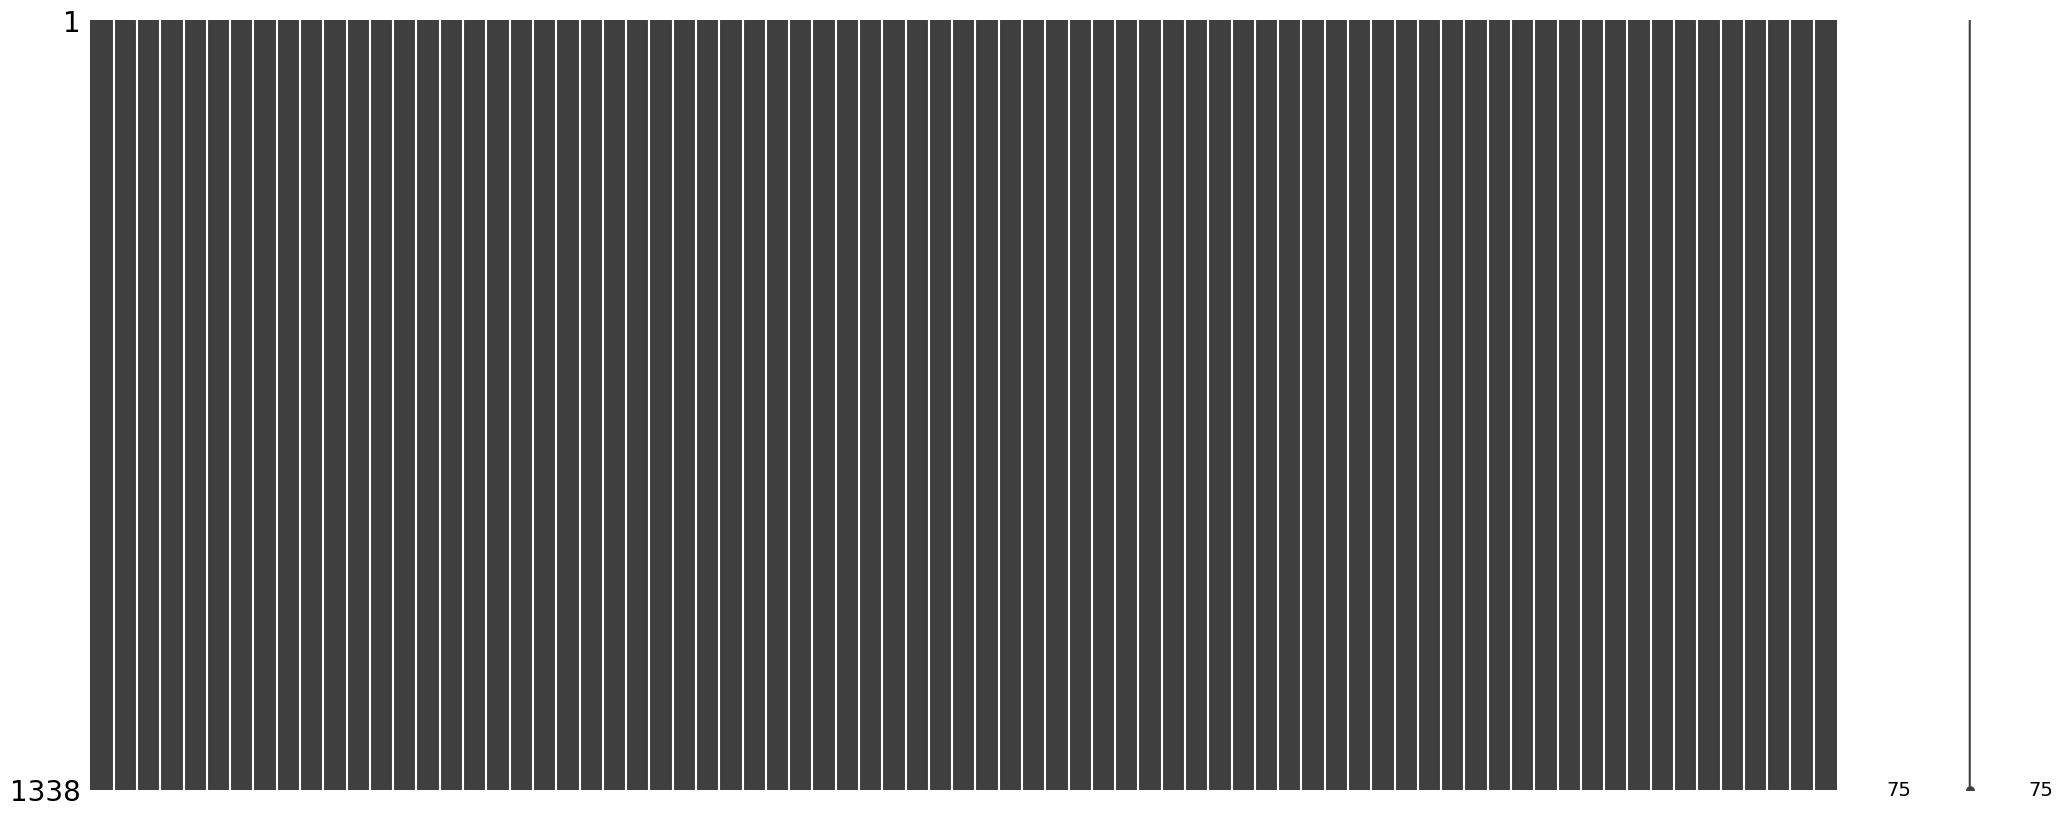

In [13]:
prices_df = prices_df.dropna()
msno.matrix(prices_df)

<Axes: >

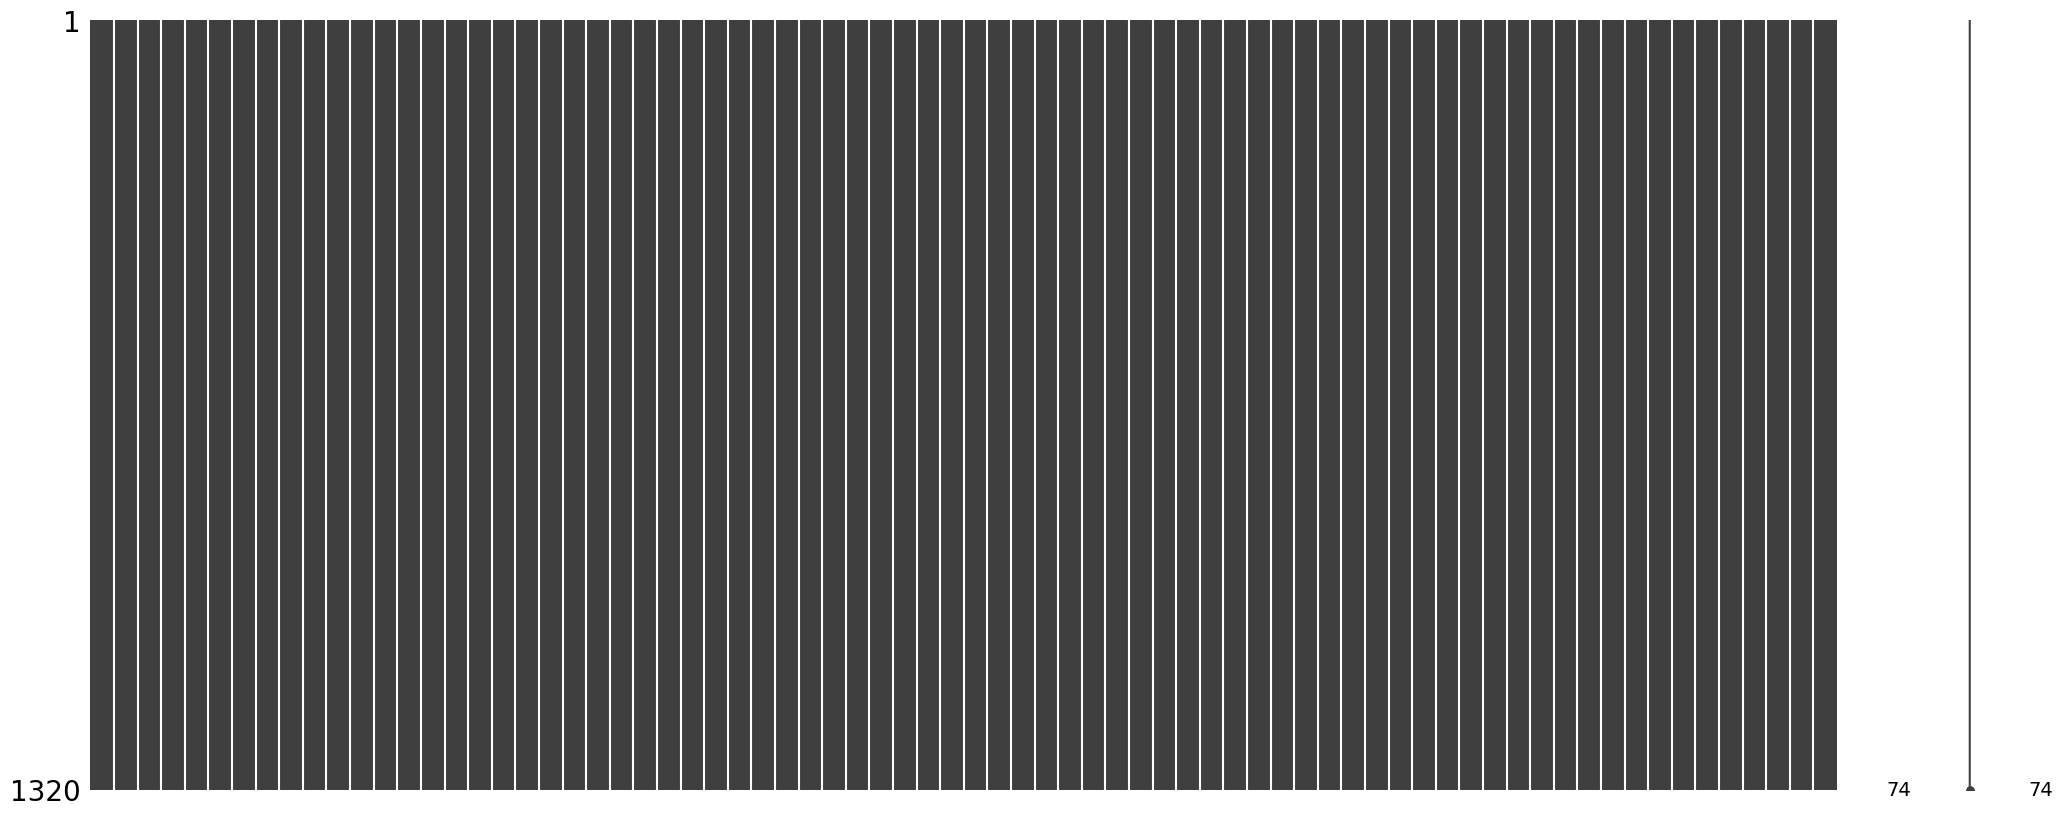

In [14]:
test_df = test_df.dropna()
msno.matrix(test_df)

In [15]:
# Getting the categorical and numerical columns 

import numpy as np
numerical_cols = test_df.select_dtypes(include=np.number).columns.tolist()
categorical_cols = test_df.select_dtypes('object').columns.tolist()
len(categorical_cols+numerical_cols)

74

In [16]:
numerical_cols

['Id',
 'MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold']

In [17]:
correlations = prices_df[numerical_cols].corrwith(prices_df['SalePrice'])
top_correlations = correlations.abs().sort_values(ascending=False).head(11)
top_correlations

OverallQual     0.783546
GrLivArea       0.711706
GarageCars      0.640154
GarageArea      0.607535
1stFlrSF        0.604714
TotalBsmtSF     0.602042
FullBath        0.569313
TotRmsAbvGrd    0.551821
YearBuilt       0.504297
YearRemodAdd    0.501435
GarageYrBlt     0.481730
dtype: float64

### Scatterplots for each numerical columns

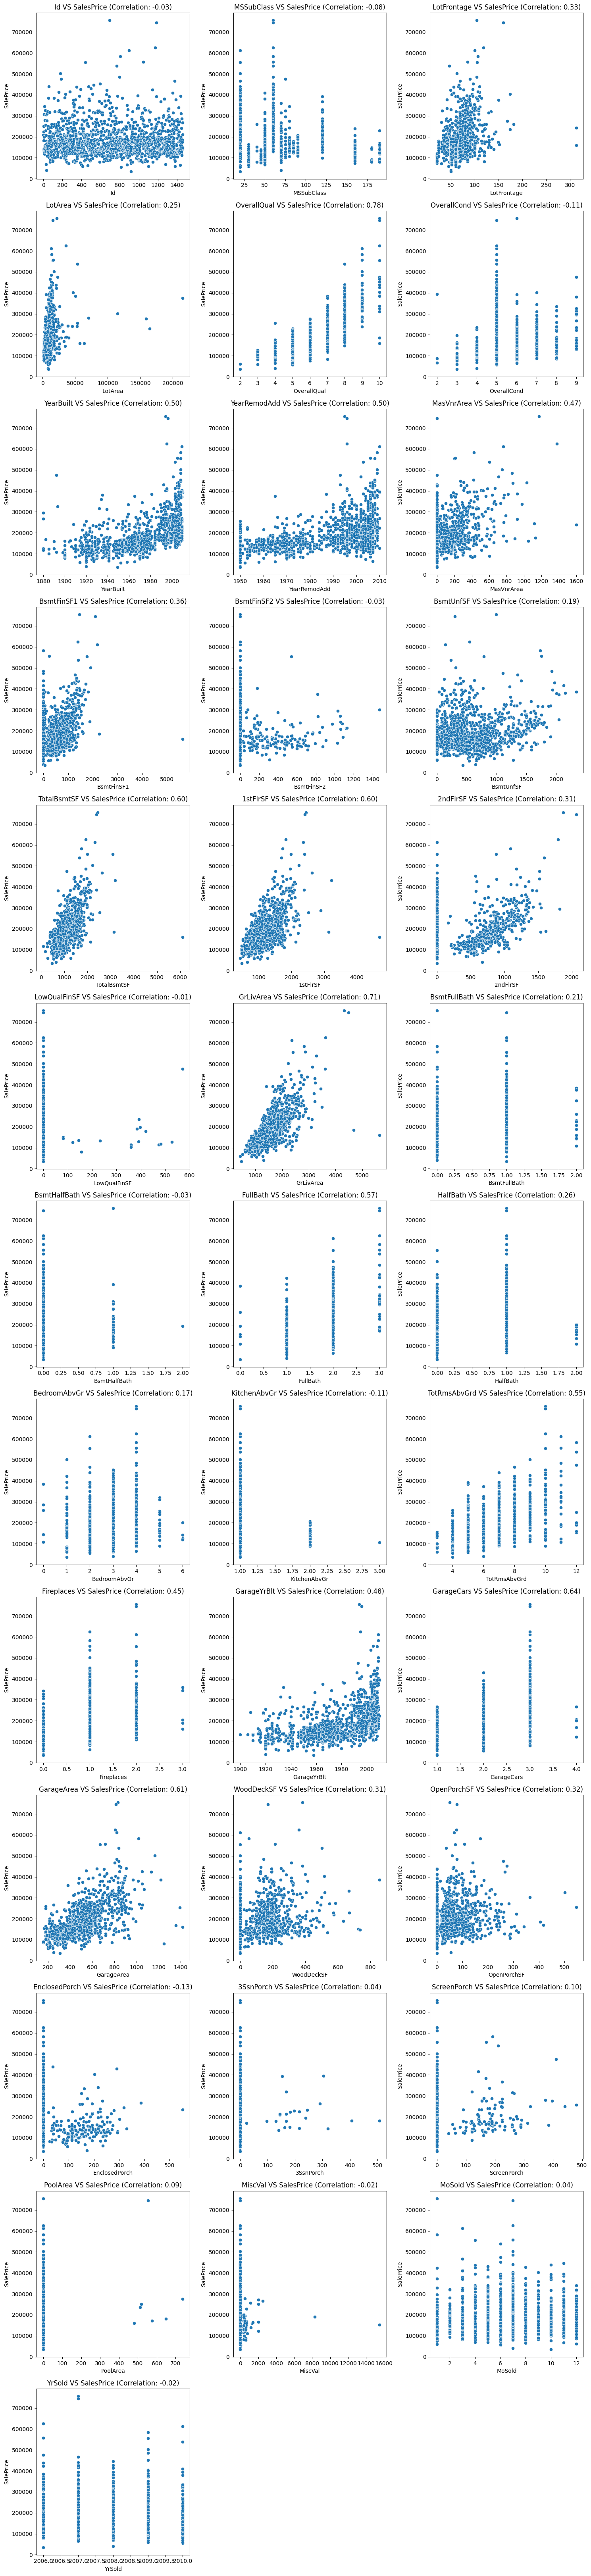

In [18]:
# Number of plots per row
num_cols_per_row = 3 

# Calculating the number of rows needed
num_rows = len(numerical_cols) // num_cols_per_row
if len(numerical_cols) % num_cols_per_row != 0:
    num_rows = num_rows + 1 # Adding rows in case the number of numerical columns is not a multiple of number of rows needed

# Creating the subplots
fig, axes = plt.subplots(num_rows, num_cols_per_row, figsize=(15, 5 * num_rows))

# Flatten the 2D array of subplots to access each subplot by index
axes = axes.flatten()

for i, col in enumerate(numerical_cols):

    # Correlation with the target variable
    correlation = prices_df[col].corr(prices_df['SalePrice'])

    # Create a scatterplot
    sns.scatterplot(x=col, y='SalePrice', data=prices_df, ax=axes[i])

    # Display the correlation on the plot
    axes[i].set_title(f"{col} VS SalesPrice (Correlation: {correlation:.2f})")

# Hide any empty subplots
for i in range(len(numerical_cols), num_rows * num_cols_per_row):
    fig.delaxes(axes[i])

# Adjust layout and show the plots
plt.tight_layout()
plt.show()

Looking at the correlation scores in the graphs it is clear that some variables are moderately to highly correlated with SalePrice while others do not show any correlation.

For training a linear regression model, the variables which show little to no correlation should be dropped from both datsets because they provide no information to the model and can negatively impact the performance.

Features that show high correlation with the target variable :- 'OverallQual', 'YearBuilt', 'YearRemodAdd', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea', 'FullBath', 'GarageCars', 'GarageArea', 'TotRmsAbvGrd'

### Removing columns that have a corelation of less than 0.30 with the target variable


In [19]:
# Identifying the columns with correlation below 0.30
low_corr_cols = correlations[correlations < 0.30].index

# Copy of the data frame
prices_df_copy = prices_df.copy()

# Train Dataset
prices_df = prices_df.drop(low_corr_cols, axis=1)

# Print the number of columns deleted
num_columns_deleted = len(low_corr_cols)
print(f"Number of columns deleted from training set: {num_columns_deleted}")

# Test Dataset
test_df = test_df.drop(low_corr_cols, axis=1)

# Print the number of columns deleted
num_columns_deleted = len(low_corr_cols)
print(f"Number of columns deleted from test set: {num_columns_deleted}")

Number of columns deleted from training set: 19
Number of columns deleted from test set: 19


### Countplots for the Categorical Columns

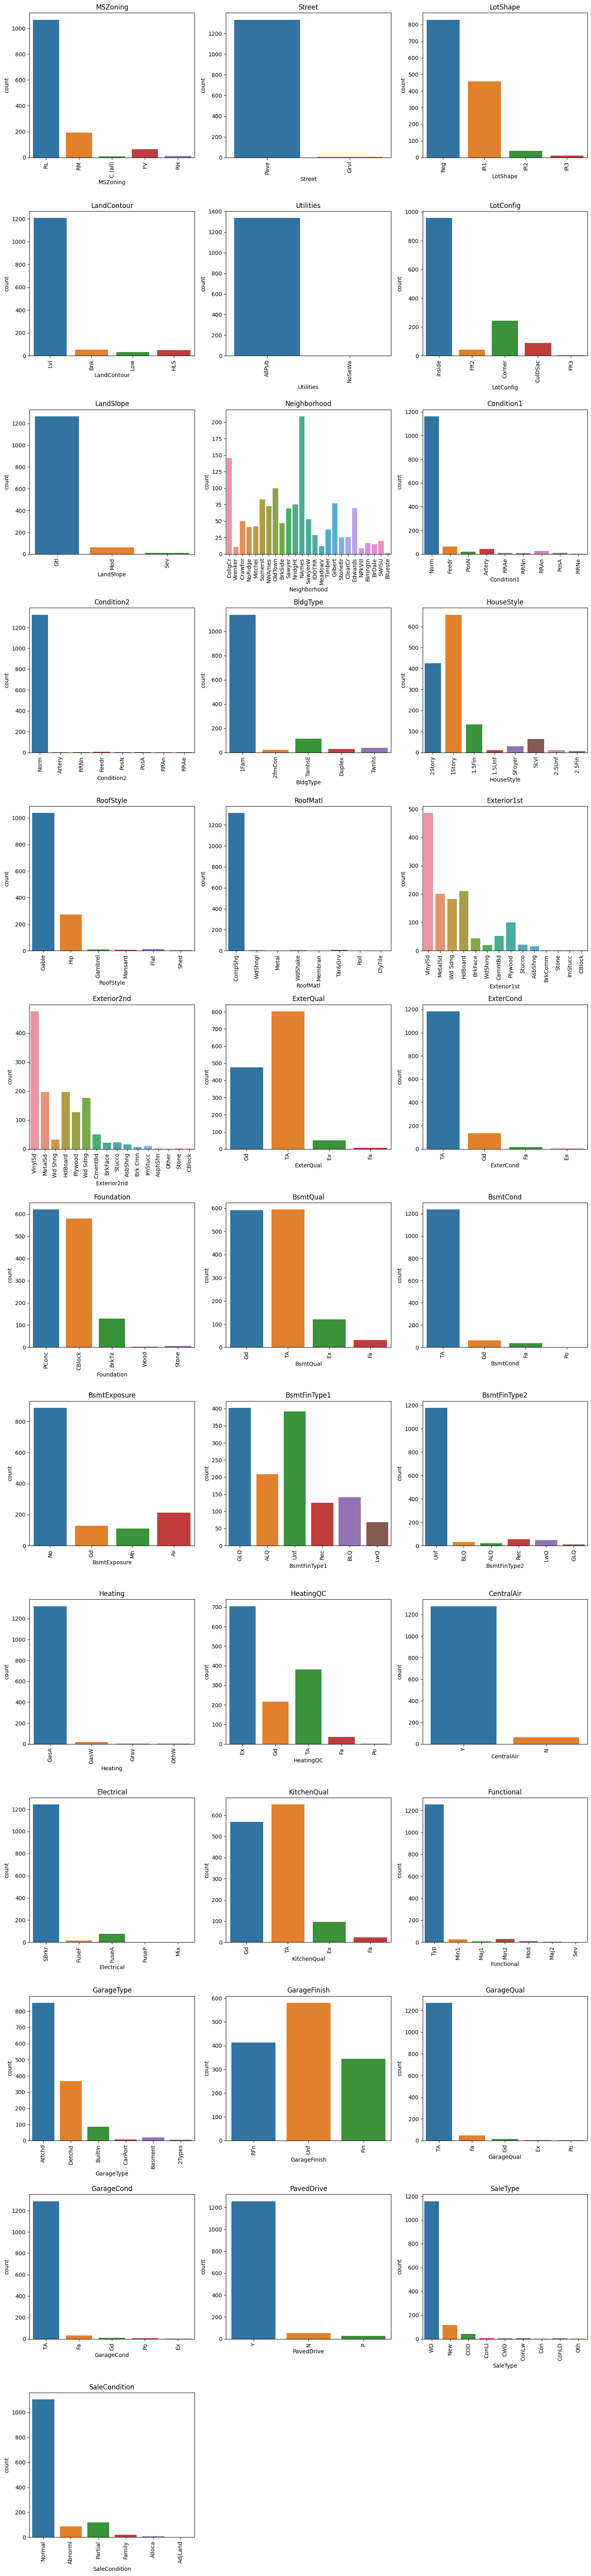

In [20]:
# Number of plots per row
num_cols_per_row = 3 

# Calculating the number of rows needed
num_rows = len(categorical_cols) // num_cols_per_row
if len(categorical_cols) % num_cols_per_row != 0:
    num_rows = num_rows + 1 # Adding rows in case the number of numerical columns is not a multiple of number of rows needed

# Creating the subplots
fig, axes = plt.subplots(num_rows, num_cols_per_row, figsize=(15, 5 * num_rows))

# Flatten the 2D array of subplots to access each subplot by index
axes = axes.flatten()

for i, col in enumerate(categorical_cols):

    # Create a countplot
    sns.countplot(x=col, data=prices_df, ax=axes[i])

    # Display the correlation on the plot
    axes[i].set_title(f"{col}")

    # Set x-axis labels vertically for better readability
    axes[i].tick_params(axis='x', labelrotation=90)

# Hide any empty subplots
for i in range(len(categorical_cols), num_rows * num_cols_per_row):
    fig.delaxes(axes[i])

# Adjust layout and show the plots
plt.tight_layout()
plt.show()

It is evident from the countplots that significant categorical features are dominated by a single value. 

For example "Utilities" feature takes on a single value of AllPub for almost all cases (more than 1400) and the variable 'Street' takes only a single value of 'Pave' for almost all cases (more than 1200)

There are also some features that could potentially affect the Sales Price of a house: 'Neighborhood', 'Exterior1st', 'Exterior2nd' and 'BsmtFinType1'

### Columns with dominant values greater than 1200

In [21]:
import shutil

print(f"{'Column':<15} {'Dominant Value':<16} {'Value Count(>1200)':<15}")
print('-'*shutil.get_terminal_size().columns)

for col in prices_df.columns:
    # Getting the value counts for the present column
    value_count = prices_df[col].value_counts()
    dominant_value = value_count.idxmax() # Get the most frequent value
    count = value_count.max() # Get the count of the most frequent value
    if count>1200:
        # Print the column name, dominant value, and its count
        print(f"{col:<15} {dominant_value:<16} {count:<15}")

Column          Dominant Value   Value Count(>1200)
--------------------------------------------------------------------------------
Street          Pave             1333           
LandContour     Lvl              1206           
Utilities       AllPub           1337           
LandSlope       Gtl              1265           
Condition2      Norm             1324           
RoofMatl        CompShg          1314           
BsmtCond        TA               1237           
Heating         GasA             1318           
CentralAir      Y                1277           
Electrical      SBrkr            1242           
Functional      Typ              1254           
GarageQual      TA               1270           
GarageCond      TA               1287           
PavedDrive      Y                1257           


Let's delete these columns since they won't be making any significant contribution to our model

In [22]:
# Training Dataset
cols = ['Street', 'Utilities', 'Condition2', 'RoofMatl', 'Heating', 'LandContour', 'LandSlope', 'BsmtCond', 'CentralAir', 'Electrical', 'Functional', 'GarageQual', 'GarageCond', 'PavedDrive']
prices_df = prices_df.drop(columns=cols)
prices_df

,MSZoning,LotFrontage,LotShape,LotConfig,Neighborhood,Condition1,BldgType,HouseStyle,OverallQual,YearBuilt,...,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,SaleType,SaleCondition,SalePrice
0,RL,65.0,Reg,Inside,CollgCr,Norm,1Fam,2Story,7,2003,...,Attchd,2003.0,RFn,2,548,0,61,WD,Normal,208500
1,RL,80.0,Reg,FR2,Veenker,Feedr,1Fam,1Story,6,1976,...,Attchd,1976.0,RFn,2,460,298,0,WD,Normal,181500
2,RL,68.0,IR1,Inside,CollgCr,Norm,1Fam,2Story,7,2001,...,Attchd,2001.0,RFn,2,608,0,42,WD,Normal,223500
3,RL,60.0,IR1,Corner,Crawfor,Norm,1Fam,2Story,7,1915,...,Detchd,1998.0,Unf,3,642,0,35,WD,Abnorml,140000
4,RL,84.0,IR1,FR2,NoRidge,Norm,1Fam,2Story,8,2000,...,Attchd,2000.0,RFn,3,836,192,84,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,RL,62.0,Reg,Inside,Gilbert,Norm,1Fam,2Story,6,1999,...,Attchd,1999.0,RFn,2,460,0,40,WD,Normal,175000
1456,RL,85.0,Reg,Inside,NWAmes,Norm,1Fam,1Story,6,1978,...,Attchd,1978.0,Unf,2,500,349,0,WD,Normal,210000
1457,RL,66.0,Reg,Inside,Crawfor,Norm,1Fam,2Story,7,1941,...,Attchd,1941.0,RFn,1,252,0,60,WD,Normal,266500
1458,RL,68.0,Reg,Inside,NAmes,Norm,1Fam,1Story,5,1950,...,Attchd,1950.0,Unf,1,240,366,0,WD,Normal,142125


In [23]:
# Test Dataset
cols = ['Street', 'Utilities', 'Condition2', 'RoofMatl', 'Heating']
test_df = test_df.drop(columns=cols)
test_df

,MSZoning,LotFrontage,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,BldgType,HouseStyle,...,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,SaleType,SaleCondition
0,RH,80.0,Reg,Lvl,Inside,Gtl,NAmes,Feedr,1Fam,1Story,...,Unf,1.0,730.0,TA,TA,Y,140,0,WD,Normal
1,RL,81.0,IR1,Lvl,Corner,Gtl,NAmes,Norm,1Fam,1Story,...,Unf,1.0,312.0,TA,TA,Y,393,36,WD,Normal
2,RL,74.0,IR1,Lvl,Inside,Gtl,Gilbert,Norm,1Fam,2Story,...,Fin,2.0,482.0,TA,TA,Y,212,34,WD,Normal
3,RL,78.0,IR1,Lvl,Inside,Gtl,Gilbert,Norm,1Fam,2Story,...,Fin,2.0,470.0,TA,TA,Y,360,36,WD,Normal
4,RL,43.0,IR1,HLS,Inside,Gtl,StoneBr,Norm,TwnhsE,1Story,...,RFn,2.0,506.0,TA,TA,Y,0,82,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1451,RL,80.0,Reg,Lvl,Inside,Mod,Mitchel,Norm,1Fam,1Story,...,RFn,1.0,336.0,TA,TA,Y,160,0,WD,Normal
1452,RM,21.0,Reg,Lvl,Inside,Gtl,MeadowV,Norm,Twnhs,2Story,...,Unf,1.0,286.0,TA,TA,Y,0,0,WD,Abnorml
1455,RM,21.0,Reg,Lvl,Inside,Gtl,MeadowV,Norm,TwnhsE,2Story,...,Unf,1.0,286.0,TA,TA,Y,0,24,WD,Abnorml
1456,RL,160.0,Reg,Lvl,Inside,Gtl,Mitchel,Norm,1Fam,1Story,...,Unf,2.0,576.0,TA,TA,Y,474,0,WD,Abnorml


We have deleted multiple columns from the table. Let's update the numerical and categorical columns as well

In [24]:
# Getting the categorical and numerical columns 
numerical_cols = test_df.select_dtypes(include=np.number).columns.tolist()
categorical_cols = test_df.select_dtypes('object').columns.tolist()

print(len(categorical_cols), len(numerical_cols))

32 18


#### Let's Log-transform the numeric columns since most of them are skewed

In [25]:
test_df.head()

,MSZoning,LotFrontage,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,BldgType,HouseStyle,...,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,SaleType,SaleCondition
0,RH,80.0,Reg,Lvl,Inside,Gtl,NAmes,Feedr,1Fam,1Story,...,Unf,1.0,730.0,TA,TA,Y,140,0,WD,Normal
1,RL,81.0,IR1,Lvl,Corner,Gtl,NAmes,Norm,1Fam,1Story,...,Unf,1.0,312.0,TA,TA,Y,393,36,WD,Normal
2,RL,74.0,IR1,Lvl,Inside,Gtl,Gilbert,Norm,1Fam,2Story,...,Fin,2.0,482.0,TA,TA,Y,212,34,WD,Normal
3,RL,78.0,IR1,Lvl,Inside,Gtl,Gilbert,Norm,1Fam,2Story,...,Fin,2.0,470.0,TA,TA,Y,360,36,WD,Normal
4,RL,43.0,IR1,HLS,Inside,Gtl,StoneBr,Norm,TwnhsE,1Story,...,RFn,2.0,506.0,TA,TA,Y,0,82,WD,Normal


In [26]:
# Concatinating both the training and testing dataset 
all_data = pd.concat((prices_df.loc[:,'MSZoning':'SaleCondition'], test_df.loc[:,'MSZoning':'SaleCondition']))
all_data

,MSZoning,LotFrontage,LotShape,LotConfig,Neighborhood,Condition1,BldgType,HouseStyle,OverallQual,YearBuilt,...,SaleCondition,LandContour,LandSlope,BsmtCond,CentralAir,Electrical,Functional,GarageQual,GarageCond,PavedDrive
0,RL,65.0,Reg,Inside,CollgCr,Norm,1Fam,2Story,7,2003,...,Normal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,RL,80.0,Reg,FR2,Veenker,Feedr,1Fam,1Story,6,1976,...,Normal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,RL,68.0,IR1,Inside,CollgCr,Norm,1Fam,2Story,7,2001,...,Normal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,RL,60.0,IR1,Corner,Crawfor,Norm,1Fam,2Story,7,1915,...,Abnorml,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,RL,84.0,IR1,FR2,NoRidge,Norm,1Fam,2Story,8,2000,...,Normal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1451,RL,80.0,Reg,Inside,Mitchel,Norm,1Fam,1Story,5,1969,...,Normal,Lvl,Mod,TA,Y,SBrkr,Typ,TA,TA,Y
1452,RM,21.0,Reg,Inside,MeadowV,Norm,Twnhs,2Story,4,1970,...,Abnorml,Lvl,Gtl,TA,Y,SBrkr,Typ,TA,TA,Y
1455,RM,21.0,Reg,Inside,MeadowV,Norm,TwnhsE,2Story,4,1970,...,Abnorml,Lvl,Gtl,TA,Y,SBrkr,Typ,TA,TA,Y
1456,RL,160.0,Reg,Inside,Mitchel,Norm,1Fam,1Story,5,1960,...,Abnorml,Lvl,Gtl,TA,Y,SBrkr,Typ,TA,TA,Y


array([[<Axes: title={'center': 'price'}>,
        <Axes: title={'center': 'log(price+1)'}>]], dtype=object)

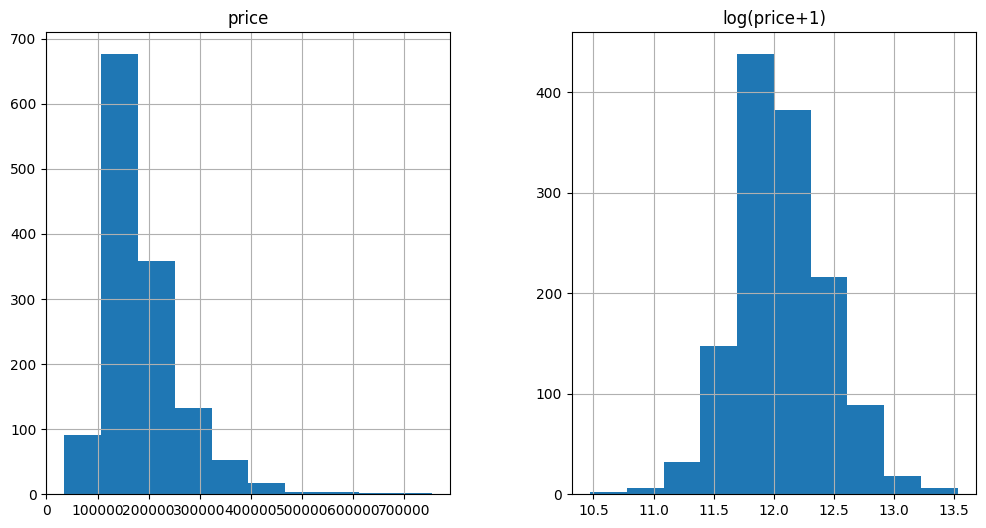

In [27]:
import matplotlib
matplotlib.rcParams['figure.figsize'] = (12.0, 6.0)

# Create a data frame with the original Skewed sales price and the log1p sale price
prices = pd.DataFrame({"price" : prices_df['SalePrice'], 
                       "log(price+1)": np.log1p(prices_df['SalePrice'])})

prices.hist()

In [28]:
from scipy.stats import skew
# log transform the target variable
prices_df['SalePrice'] = np.log1p(prices_df['SalePrice'])

# log transform skewed numeric features
skewed_features = prices_df[numerical_cols].apply(lambda x: skew(x))

# Filter the columns for skew value > 0.75
skewed_features = skewed_features[skewed_features > 0.75]

# Get the columns with skew > 0.75
skewed_features = skewed_features.index

# Apply lop1p to all the columns in skewed_features
all_data[skewed_features] = np.log1p(all_data[skewed_features])

#### OneHot Encoding the categorical Features

In [29]:
all_data_encoded = pd.get_dummies(all_data, columns=categorical_cols, drop_first=True, dtype=int)
all_data_encoded

,LotFrontage,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,4.189655,7,2003,2003,5.283204,6.561031,6.753438,6.753438,6.751101,7.444833,...,0,0,0,0,1,0,0,0,1,0
1,4.394449,6,1976,1976,0.000000,6.886532,7.141245,7.141245,0.000000,7.141245,...,0,0,0,0,1,0,0,0,1,0
2,4.234107,7,2001,2002,5.093750,6.188264,6.825460,6.825460,6.765039,7.488294,...,0,0,0,0,1,0,0,0,1,0
3,4.110874,7,1915,1970,0.000000,5.379897,6.629363,6.869014,6.629363,7.448916,...,0,0,0,0,1,0,0,0,0,0
4,4.442651,8,2000,2000,5.860786,6.486161,7.044033,7.044033,6.960348,7.695758,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1451,4.394449,5,1969,1979,5.273000,4.787492,7.007601,7.215975,0.000000,7.215975,...,0,0,0,0,1,0,0,0,1,0
1452,3.091042,4,1970,1970,0.000000,6.013715,6.304449,6.304449,6.304449,6.996681,...,0,0,0,0,1,0,0,0,0,0
1455,3.091042,4,1970,1970,0.000000,5.533389,6.304449,6.304449,6.304449,6.996681,...,0,0,0,0,1,0,0,0,0,0
1456,5.081404,5,1960,1996,0.000000,7.110696,7.110696,7.110696,0.000000,7.110696,...,0,0,0,0,1,0,0,0,0,0


In [30]:
# Dividing the training and testing data set
X_train = all_data_encoded[:prices_df.shape[0]]
X_test = all_data_encoded[prices_df.shape[0]:]
target = prices_df['SalePrice']

In [31]:
X_train

,LotFrontage,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,4.189655,7,2003,2003,5.283204,6.561031,6.753438,6.753438,6.751101,7.444833,...,0,0,0,0,1,0,0,0,1,0
1,4.394449,6,1976,1976,0.000000,6.886532,7.141245,7.141245,0.000000,7.141245,...,0,0,0,0,1,0,0,0,1,0
2,4.234107,7,2001,2002,5.093750,6.188264,6.825460,6.825460,6.765039,7.488294,...,0,0,0,0,1,0,0,0,1,0
3,4.110874,7,1915,1970,0.000000,5.379897,6.629363,6.869014,6.629363,7.448916,...,0,0,0,0,1,0,0,0,0,0
4,4.442651,8,2000,2000,5.860786,6.486161,7.044033,7.044033,6.960348,7.695758,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,4.143135,6,1999,2000,0.000000,0.000000,6.860664,6.860664,6.543912,7.407318,...,0,0,0,0,1,0,0,0,1,0
1456,4.454347,6,1978,1988,4.787492,6.673298,7.341484,7.637234,0.000000,7.637234,...,0,0,0,0,1,0,0,0,1,0
1457,4.204693,7,1941,2006,0.000000,5.620401,7.050123,7.080868,7.050123,7.758333,...,0,0,0,0,1,0,0,0,1,0
1458,4.234107,5,1950,1996,0.000000,3.912023,6.983790,6.983790,0.000000,6.983790,...,0,0,0,0,1,0,0,0,1,0


In [32]:
X_test

,LotFrontage,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,4.394449,5,1961,1961,0.000000,6.150603,6.783325,6.799056,0.000000,6.799056,...,0,0,0,0,1,0,0,0,1,0
1,4.406719,6,1958,1958,4.691348,6.828712,7.192934,7.192934,0.000000,7.192934,...,0,0,0,0,1,0,0,0,1,0
2,4.317488,5,1997,1998,0.000000,6.674561,6.834109,6.834109,6.553933,7.396335,...,0,0,0,0,1,0,0,0,1,0
3,4.369448,6,1998,1998,3.044522,6.401917,6.831954,6.831954,6.520621,7.380879,...,0,0,0,0,1,0,0,0,1,0
4,3.784190,8,1992,1992,0.000000,5.575949,7.155396,7.155396,0.000000,7.155396,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1451,4.394449,5,1969,1979,5.273000,4.787492,7.007601,7.215975,0.000000,7.215975,...,0,0,0,0,1,0,0,0,1,0
1452,3.091042,4,1970,1970,0.000000,6.013715,6.304449,6.304449,6.304449,6.996681,...,0,0,0,0,1,0,0,0,0,0
1455,3.091042,4,1970,1970,0.000000,5.533389,6.304449,6.304449,6.304449,6.996681,...,0,0,0,0,1,0,0,0,0,0
1456,5.081404,5,1960,1996,0.000000,7.110696,7.110696,7.110696,0.000000,7.110696,...,0,0,0,0,1,0,0,0,0,0


### Scaling the numerical columns

In [33]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

def apply_transform(X_train_raw, X_test_raw, cols_to_transform, scaler_type='standard'):
    if scaler_type == 'standard':
        scaler = StandardScaler()
    elif scaler_type == 'minmax':
        scaler = MinMaxScaler()
    elif scaler_type == 'robust':
        scaler = RobustScaler()
    else:
        raise ValueError("Invalid scaler_type. Choose from 'standard', 'minmax', or 'robust'")
    
    scaler.fit(X_train_raw[cols_to_transform])

    # Get the scaled values for the specified columns
    train_values_transformed = scaler.transform(X_train_raw[cols_to_transform])
    test_values_transformed = scaler.transform(X_test_raw[cols_to_transform])

    # Make a copy so that we can modify the scaled data into this copy and not the original
    X_train_transformed = X_train_raw.copy()
    X_test_transformed = X_test_raw.copy()

    # Add the scaled data into the copy of the original test and train sets
    X_train_transformed[cols_to_transform] = train_values_transformed
    X_test_transformed[cols_to_transform] = test_values_transformed

    return X_train_transformed, X_test_transformed

In [34]:
X_train_transformed, X_test_transformed = apply_transform(X_train, X_test, numerical_cols, "robust")

### Linear Rigression Model

### Feature Selection
Performing feature selection using the SelectKBest method with a scoring function f_regression and keeping the top 150 features

Feature 0   182.66
Feature 1   2503.45
Feature 2   651.68
Feature 3   629.31
Feature 4   245.47
Feature 5   29.90
Feature 6   723.66
Feature 7   782.69
Feature 8   36.30
Feature 9   1515.73

..............



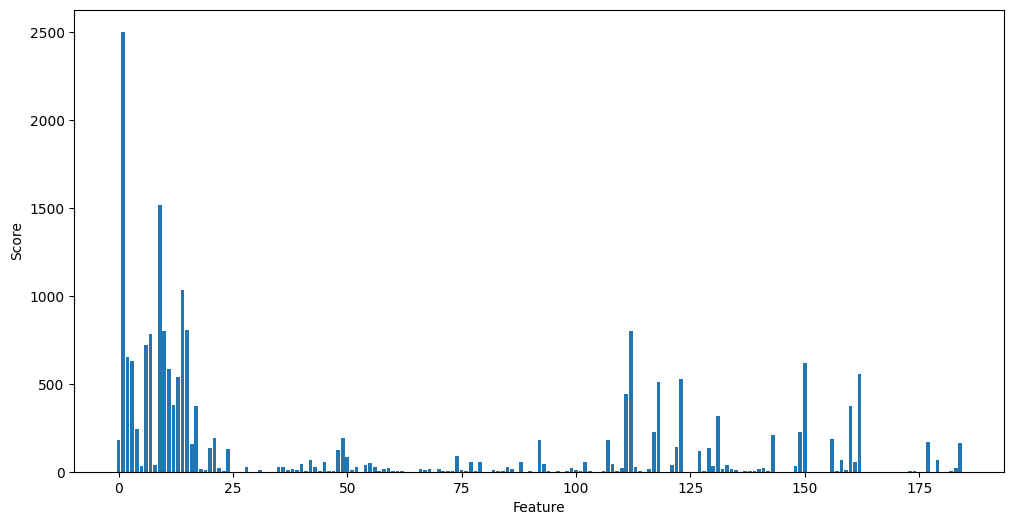

In [35]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

fs = SelectKBest(score_func=f_regression, k=150)

# Fitting the selector with the training data
fs.fit(X_train_transformed, target)

# Transforming both training and test data to include only the selected 150 features
X_train_transformed_fs = fs.transform(X_train_transformed)
X_test_transformed_fs = fs.transform(X_test_transformed)

# Printing the feature scores for the first 10 features
for i in range(len(fs.scores_)):
    if i == 10:
        print("\n..............\n")
        break
    print(f"Feature {i:<3} {fs.scores_[i]:.2f}")


plt.bar([i for i in range(len(fs.scores_))], fs.scores_)
plt.xlabel("Feature")
plt.ylabel("Score")
plt.show()

In [36]:
X_train_transformed_fs.shape

(1338, 150)

In [37]:
X_test_transformed_fs.shape

(1320, 150)

### Splitting the training data to make a validation dataset

In [38]:
from sklearn.model_selection import train_test_split

# Split features
X_train_df, X_val_df, train_target, val_target = train_test_split(X_train_transformed_fs, target, test_size=0.2, random_state=42)

# For simplicity, changing the name for test set as well
X_test_df = X_test_transformed_fs

In [39]:
print(f" Training Set: { X_train_df.shape} \n Validation Set: {X_val_df.shape} \n Test Set: {X_test_df.shape} \n Train target : {train_target.shape} \n Validation target : {val_target.shape}")

 Training Set: (1070, 150) 
 Validation Set: (268, 150) 
 Test Set: (1320, 150) 
 Train target : (1070,) 
 Validation target : (268,)


In [40]:
# Define the RMSE(Root Mean Squared Error) function
def rmse(target, predictions):
    return np.sqrt(np.mean(np.square(target - predictions)))

In [46]:
from sklearn.linear_model import LinearRegression

lin_model = LinearRegression()
lin_model.fit(X_train_df, train_target)
predictions = lin_model.predict(X_train_df)
print(f"Training RMSE: {rmse(train_target, predictions)}")

Training RMSE: 0.1114248242674724


In [47]:
lin_model.fit(X_val_df, val_target)
predictions = lin_model.predict(X_val_df)
print(f"Validation RMSE: {rmse(val_target, predictions)}")

Validation RMSE: 0.07724101976297913


### Stochastic Gradient Descent (SGD)

In [48]:
from sklearn.linear_model import SGDRegressor

sgd_model = SGDRegressor().fit(X_train_df, train_target)
predictions = sgd_model.predict(X_train_df)
print(f"Training RMSE: {rmse(train_target, predictions)}")

Training RMSE: 0.39672564423928536


In [49]:
sgd_model.fit(X_val_df, val_target)
predictions = sgd_model.predict(X_val_df)
print(f"Validation RMSE: {rmse(val_target, predictions)}")

Validation RMSE: 0.43584478050943165


Linear Regression Model is giving much better performance than the SGD Regressor model

### Prediction on new data

In [50]:
new_predictions = lin_model.predict(X_test_df)

#### Plotting the Saleprice from the training data target and the calculated Saleprice from the test data


C:\Users\HP\AppData\Local\Temp\ipykernel_12324\2039947104.py:4: RuntimeWarning: overflow encountered in exp
  sort2 = np.exp(sorted(new_predictions))


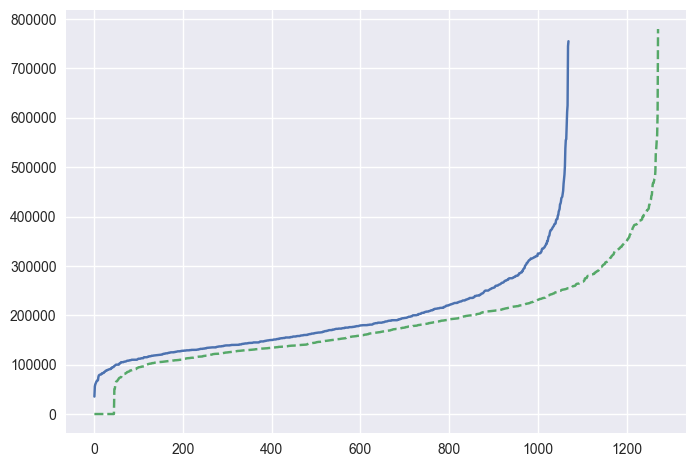

In [78]:
sort1 = np.exp(sorted(train_target))
plt.plot(sort1, linestyle='-')

sort2 = np.exp(sorted(new_predictions))
plt.plot(sort2, linestyle='dashed')